# Some Basic Examples

In [337]:
library(tidyverse)

In [338]:
x = faithful$waiting
y = faithful$eruptions
data = data_frame(
    x = x,
    y = y
)

glimpse(data)

Observations: 272
Variables: 2
$ x <dbl> 79, 54, 74, 62, 85, 55, 88, 85, 51, 85, 54, 84, 78, 47, 83, 52, 6...
$ y <dbl> 3.600, 1.800, 3.333, 2.283, 4.533, 2.883, 4.700, 3.600, 1.950, 4....


In [339]:
head(data)

x,y
79,3.600
54,1.800
74,3.333
62,2.283
85,4.533
55,2.883


## Q1. Regression Analysis: Considering some value of  a dependent and independent variable and calculate the followings:
        a. Regression coefficient and intercept.
        b. Draw scatter plot and fitted regression line.
        c. Find estimated value of dependant variable.
        d. Predict confidence intervals of the estimated value of dependant variable. 
        e. Calculate residuals.
        f. Calculate a graph showing the distance between estimated value and original value of dependant variable.
        g. Test normality of residuals by Q-Q plot.

In [340]:
## a. Regression coefficient and intercept.
ols = lm(y~x, data = data)
summary(ols)


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29917 -0.37689  0.03508  0.34909  1.19329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.874016   0.160143  -11.70   <2e-16 ***
x            0.075628   0.002219   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4965 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


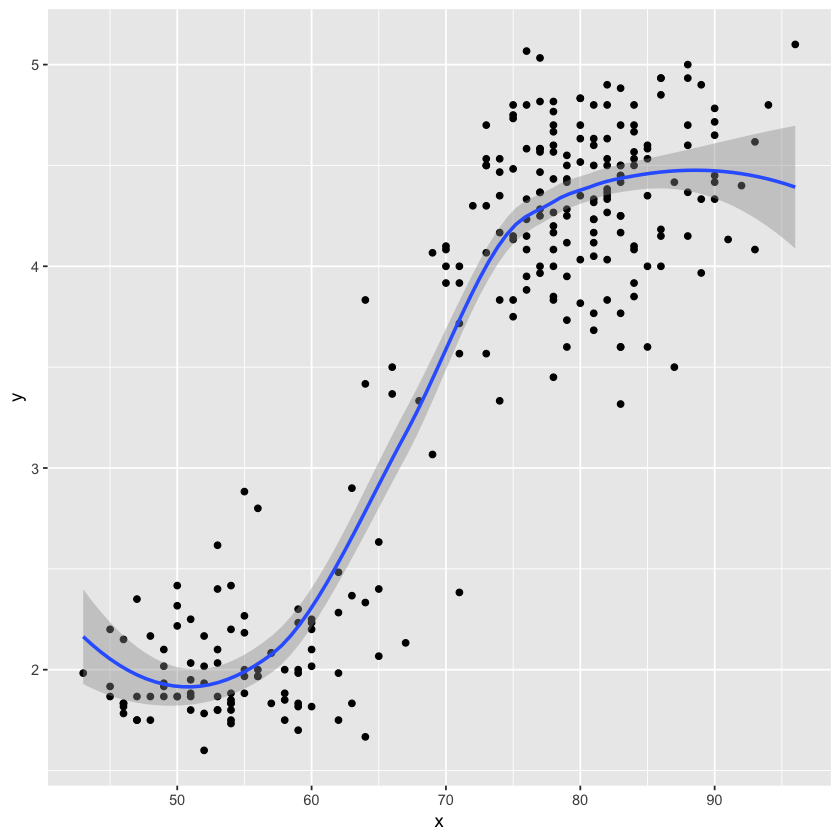

In [341]:
## b. Draw scatter plot and fitted regression line.
data %>% ggplot(aes(x,y)) + geom_point() + geom_smooth()

In [342]:
## c & e. Find estimated value of dependant variable & Calculate residuals.
data = data %>% mutate(y_hat=ols$fitted.values, residuals = ols$residuals)
head(data, n=10)

x,y,y_hat,residuals
79,3.600,4.100592,-0.50059190
54,1.800,2.209893,-0.40989320
74,3.333,3.722452,-0.38945216
62,2.283,2.814917,-0.53191679
85,4.533,4.554360,-0.02135959
55,2.883,2.285521,0.59747885
88,4.700,4.781243,-0.08124343
85,3.600,4.554360,-0.95435959
51,1.950,1.983009,-0.03300936
85,4.350,4.554360,-0.20435959


In [343]:
## d. Predict confidence intervals of the estimated value of dependant variable.
confint(ols, level = 0.95)

,2.5 %,97.5 %
(Intercept),-2.18930436,-1.55872761
x,0.07126011,0.07999579


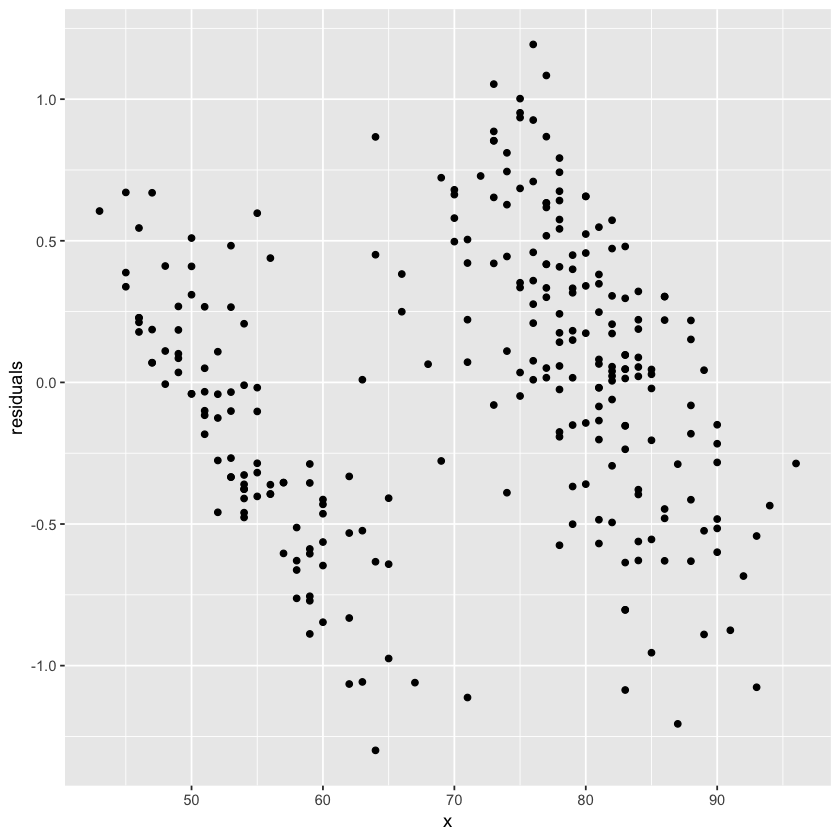

In [344]:
## f. Calculate a graph showing the distance between estimated value and original value of dependant variable.
ggplot(data, aes(x, residuals)) + geom_point()

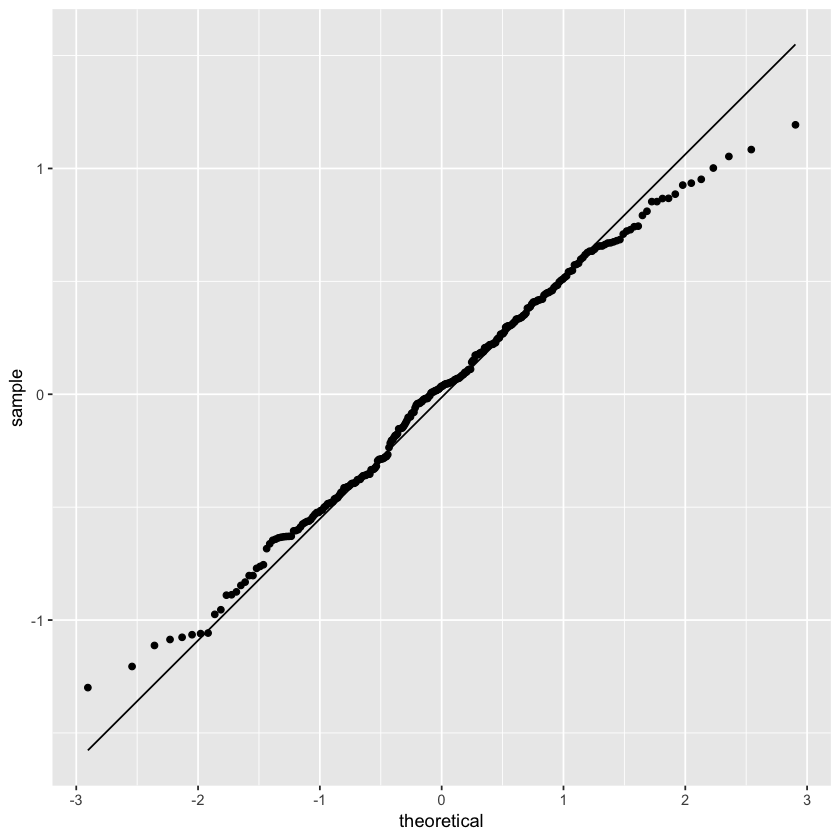

In [345]:
## g. Test normality of residuals by Q-Q plot.
ggplot(data, aes(sample = residuals)) + stat_qq() + stat_qq_line()

## Q2. Correlation Analysis: Considering some value of  a dependent and independent variable and calculate the followings:
        a. Pearson coefficient of correlation.
        b. Pearson product moment coefficient of correlation.
        c. Spearman rank correlation test.
        d. Kendals’ tao test.

In [346]:
## a. Pearson coefficient of correlation.
cor(x, y, use="complete.obs")

[1] 0.9008112

In [347]:
## b. Pearson product moment coefficient of correlation.
cor.test(x, y, use="complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = 34.089, df = 270, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8756964 0.9210652
sample estimates:
      cor 
0.9008112 


In [348]:
## c. Spearman rank correlation test.
cor.test(x, y, method="spearman")

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  x and y
S = 744660, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7779721 


In [349]:
## d. Kendals’ tao test.
cor.test(x,y,method="kendall")


	Kendall's rank correlation tau

data:  x and y
z = 13.902, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5747674 


## Q3
#### a. X ~ binomial(25, 0.45), calculate
        (i) P(X = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [350]:
print(paste("i:", dbinom(2, 25, 0.45)))
print(paste("ii:", pbinom(3, 25, 0.45)))
print(paste("iii:", pbinom(2, 25, 0.45)))
print(paste("iv:", 1 - pbinom(4, 25, .045)))
print(paste("v:", qbinom(0.5, 25, 0.45)))

[1] "i: 6.48467389079998e-05"
[1] "ii: 0.000478540306447468"
[1] "iii: 7.17743987518336e-05"
[1] "iv: 0.00460431062086575"
[1] "v: 11"


#### b. X ~ Poisson (0.005), calculate 
        (i) P(X = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.345.

In [351]:
print(paste("i:", dpois(2, 0.005)))
print(paste("ii:", ppois(3, 0.005)))
print(paste("iii:", ppois(2, 0.005)))
print(paste("iv:", 1 - ppois(4, 0.005)))
print(paste("v:", qpois(0.345, 0.005)))

[1] "i: 1.24376559899085e-05"
[1] "ii: 0.999999999974062"
[1] "iii: 0.999999979244636"
[1] "iv: 2.60902410786912e-14"
[1] "v: 0"


#### c. X ~ Geometric (0.45) calculate 
        (i) P(X = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [352]:
print(paste("i:", dgeom(2, 0.45)))
print(paste("ii:", pgeom(3, 0.45)))
print(paste("iii:", pgeom(2, 0.45)))
print(paste("iv:", 1 - pgeom(4, 0.45)))
print(paste("v:", qgeom(0.5, 0.45)))

[1] "i: 0.136125"
[1] "ii: 0.90849375"
[1] "iii: 0.833625"
[1] "iv: 0.0503284374999999"
[1] "v: 1"


#### d. X ~ Negative Binomial (5,0.315) calculate 
        (i) P(X = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.57.

In [353]:
print(paste("i:", dnbinom(2, 5, 0.315)))
print(paste("ii:", pnbinom(3, 5, 0.315)))
print(paste("iii:", pnbinom(2, 5, 0.315)))
print(paste("iv:", 1 - pnbinom(4, 5, 0.315)))
print(paste("v:", qnbinom(0.5, 5, 0.315)))

[1] "i: 0.0218285642291801"
[1] "ii: 0.0704414226266581"
[1] "iii: 0.035552100800352"
[1] "iv: 0.881760206471302"
[1] "v: 10"


#### e. X ~ Normal (25, 0.05) calculate 
        (i) P(X <= 3)  
        (ii) P(X < 3) 
        (iii) P(X > 4) 
        (iv) Find value k such that P(X <= k) = 0.235.

In [354]:
print(paste("i:", pnorm(3, 25, sqrt(.05))))
print(paste("ii:", pnorm(2, 25, sqrt(.05))))
print(paste("iii:", 1 - pnorm(4, 25, sqrt(.05))))
print(paste("iv:", qnorm(0.235, 25, sqrt(.05))))

[1] "i: 0"
[1] "ii: 0"
[1] "iii: 1"
[1] "iv: 24.8384487727569"


#### f. X ~ Uniform (25, 5) calculate 
        (i) P(X <= 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) (v) Find value k such that P(X <= k) = 0.5.

In [355]:
## Not Running - Output Will be NaN

#### g. X ~ Exponential(0.45) calculate 
        (i) P(X> = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [356]:
print(paste("i:", 1 - pexp(2, 0.45)))
print(paste("ii:", pexp(3, 0.45)))
print(paste("iii:", pexp(2, 0.45)))
print(paste("iv:", 1 - pexp(4, 0.45)))
print(paste("v:", qexp(0.5, 0.45)))

[1] "i: 0.406569659740599"
[1] "ii: 0.740759739354108"
[1] "iii: 0.593430340259401"
[1] "iv: 0.165298888221587"
[1] "v: 1.54032706791099"


#### h. X ~ Gamma (2, 10) calculate 
        (i) P(X< = 2) 
        (ii) P(X <= 30)  
        (iii) P(X <1 3) 
        (iv) P(X >14) 
        (v) Find value k such that P(X <= k) = 0.5.

In [357]:
print(paste("i:", pgamma(2, 2, 10)))
print(paste("ii:", pgamma(30, 2, 10)))
print(paste("iii:", pgamma(12, 2, 10)))
print(paste("iv:", 1 - pgamma(14, 2, 10)))
print(paste("v:", qgamma(0.5, 2, 10)))

[1] "i: 0.999999956715774"
[1] "ii: 1"
[1] "iii: 1"
[1] "iv: 0"
[1] "v: 0.167834699001666"


#### i. X ~ Weibull(25, 4) calculate 
        (i) P(X> = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [358]:
print(paste("i:", 1 - pweibull(1, 25, 4)))
print(paste("ii:", pweibull(3, 25, 4)))
print(paste("iii:", pweibull(2, 25, 4)))
print(paste("iv:", 1 - pweibull(4, 25, 4)))
print(paste("v:", qweibull(0.5, 25, 4)))

[1] "i: 0.999999999999999"
[1] "ii: 0.000752260368353702"
[1] "iii: 2.98023219436061e-08"
[1] "iv: 0.367879441171442"
[1] "v: 3.94178570122672"


#### j. X ~ Beta (5, 4) calculate 
        (i) P(X >= 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [359]:
print(paste("i:", 1 - pbeta(1, 5, 4)))
print(paste("ii:", pbeta(3, 5, 4)))
print(paste("iii:", pbeta(2, 5, 4)))
print(paste("iv:", 1 - pbeta(4, 5, 4)))
print(paste("v:", qbeta(0.5, 5, 4)))

[1] "i: 0"
[1] "ii: 1"
[1] "iii: 1"
[1] "iv: 0"
[1] "v: 0.559844795365234"


#### k. X ~ Chisquare (25) calculate 
        (i) P(X = 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [360]:
print(paste("i:", dchisq(2, 25)))
print(paste("ii:", pchisq(3, 25)))
print(paste("iii:", pchisq(2, 25)))
print(paste("iv:", 1 - pchisq(4, 25)))
print(paste("v:", qchisq(0.5, 25)))

[1] "i: 1.34416250258042e-09"
[1] "ii: 2.32951335965341e-08"
[1] "iii: 2.32170929890269e-10"
[1] "iv: 0.999999463062159"
[1] "v: 24.3365866978843"


#### l. X ~t distribution (25) calculate 
        (i) P(X >= 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [361]:
print(paste("i:", 1 - pt(1, 25)))
print(paste("ii:", pt(3, 25)))
print(paste("iii:", pt(2, 25)))
print(paste("iv:", 1 - pt(4, 25)))
print(paste("v:", qt(0.5, 25)))

[1] "i: 0.163445956345921"
[1] "ii: 0.996980910217428"
[1] "iii: 0.971762009786551"
[1] "iv: 0.000247721835266113"
[1] "v: 0"


#### m. X ~ F-distribution (3, 5) calculate 
        (i) P(X >= 2) 
        (ii) P(X <= 3)  
        (iii) P(X < 3) 
        (iv) P(X > 4) 
        (v) Find value k such that P(X <= k) = 0.5.

In [362]:
print(paste("i:", 1 - pf(1, 3, 5)))
print(paste("ii:", pf(3, 3, 5)))
print(paste("iii:", pf(2, 3, 5)))
print(paste("iv:", 1 - pf(4, 3, 5)))
print(paste("v:", qf(0.5, 3, 5)))

[1] "i: 0.464854789993635"
[1] "ii: 0.8661452793012"
[1] "iii: 0.767376081999921"
[1] "iv: 0.0848769975415132"
[1] "v: 0.907146219819019"


## Q4. Generate 1000 random observation from 
    (a) binomial(8, 0.5)   
    (b) Poisson (0.005) 
    (c) Geometric (0.45)  
    (e)Normal (25, 0.05) 
    (f)Uniform(25,5)  
    (g) Exponential (0.45)  
    (f)Weibull(2, 12) 
    (g) Beta () 
    (h) Chisquare (25) 
    (i)t distribution 
    (j) F-distribution (20,5).

In [363]:
# (a) binomial(8, 0.5) 
sample = rbinom(1000, 8, 0.5)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 4.004"
[1] "Variance: 1.962"


In [364]:
## (b) Poisson (0.005)
sample = rpois(1000, 0.005)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 0.009"
[1] "Variance: 0.009"


In [365]:
## (c) Geometric (0.45)
sample = rgeom(1000, 0.45)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 1.228"
[1] "Variance: 2.901"


In [366]:
## (e)Normal (25, 0.05)
sample = rnorm(1000, 25, sqrt(.05))
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 24.994"
[1] "Variance: 0.053"


In [367]:
## (f)Uniform(25,5)
sample = runif(1000,25,5)
print(paste("Mean:", round(mean(sample, na.rm = T), 3)))
print(paste("Variance:", round(var(sample, na.rm = T), 3)))

Warning message in runif(1000, 25, 5):
“NAs produced”

[1] "Mean: NaN"
[1] "Variance: NA"


In [368]:
## (g) Exponential (0.45)  
sample = rexp(1000, 0.45)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 2.18"
[1] "Variance: 4.678"


In [369]:
## (f)Weibull(2, 12) 
sample = rweibull(1000, 2, 12)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 10.667"
[1] "Variance: 31.653"


In [370]:
## (g) Beta () 
sample = rbeta(1000, 7, 4)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 0.644"
[1] "Variance: 0.018"


In [371]:
## (h) Chisquare (25) 
sample = rchisq(1000, 25)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 25.177"
[1] "Variance: 50.202"


In [372]:
## (i)t distribution 
sample = rt(1000, 25)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: -0.056"
[1] "Variance: 1.091"


In [373]:
## j) F-distribution (20,5)
sample = rf(1000, 20, 5)
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

[1] "Mean: 1.723"
[1] "Variance: 3.903"


In [374]:
sample = r(1000, )
print(paste("Mean:", round(mean(sample), 3)))
print(paste("Variance:", round(var(sample), 3)))

ERROR: Error in r(1000, ): could not find function "r"


## Q5. Simulation: simulate some random numbers from a linear model.

In [375]:
set.seed(111)
x = rnorm(200)
e = rnorm(200, 5, 7)
y = .7 + .83 * x + e
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-11.341   1.651   6.372   6.246  10.464  26.327 

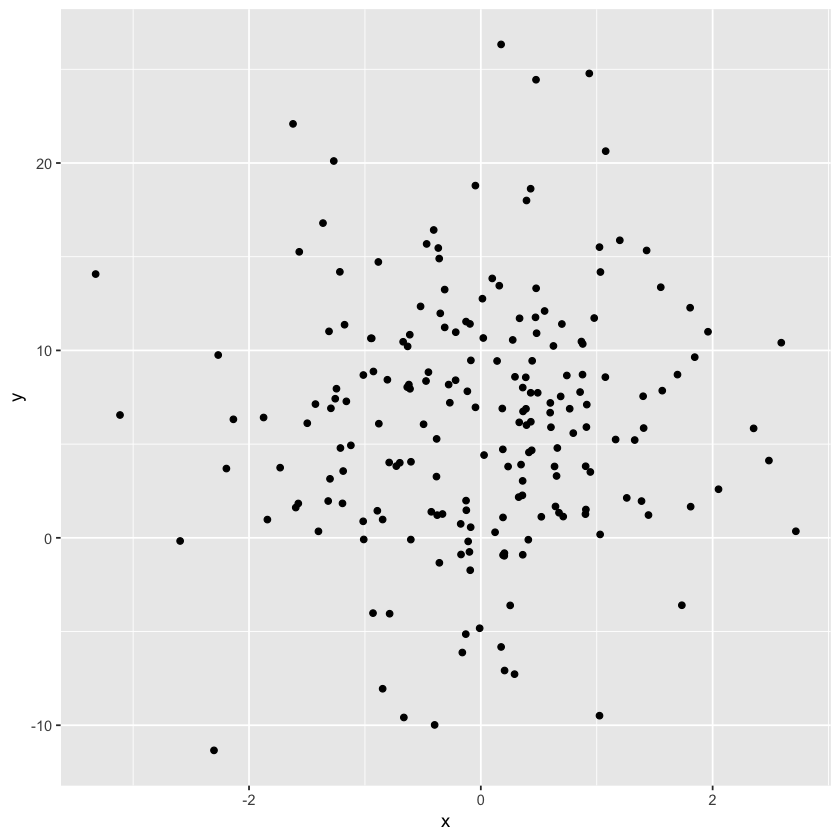

In [376]:
ggplot(data_frame(x,y), aes(x,y)) + geom_point()

## Q6. Consider any 4 (3 by 3) matrices and calculate each matrix’s square and cube.

In [377]:
sqr = function(x) {
    x %*% x
}

cube = function(x) {
    x %*% x %*% x
}

In [378]:
for (i in 1:4) {
    m = matrix(sample(1:20, 9), 3, 3)
    print("Random Matrix: ")
    print(m)
    
    print("Square Matrix: ")
    print(sqr(m))
    
    print("Cube Matrix: ")
    print(cube(m))
    
}

[1] "Random Matrix: "
     [,1] [,2] [,3]
[1,]    7   12    5
[2,]   18    9   20
[3,]    2    8   19
[1] "Square Matrix: "
     [,1] [,2] [,3]
[1,]  275  232  370
[2,]  328  457  650
[3,]  196  248  531
[1] "Cube Matrix: "
      [,1]  [,2]  [,3]
[1,]  6841  8348 13045
[2,] 11822 13249 23130
[3,]  6898  8832 16029
[1] "Random Matrix: "
     [,1] [,2] [,3]
[1,]    7   17    2
[2,]   10   14    4
[3,]    5    6    1
[1] "Square Matrix: "
     [,1] [,2] [,3]
[1,]  229  369   84
[2,]  230  390   80
[3,]  100  175   35
[1] "Cube Matrix: "
     [,1] [,2] [,3]
[1,] 5713 9563 2018
[2,] 5910 9850 2100
[3,] 2625 4360  935
[1] "Random Matrix: "
     [,1] [,2] [,3]
[1,]   12    9   20
[2,]    1    3   18
[3,]    2   16   15
[1] "Square Matrix: "
     [,1] [,2] [,3]
[1,]  193  455  702
[2,]   51  306  344
[3,]   70  306  553
[1] "Cube Matrix: "
     [,1]  [,2]  [,3]
[1,] 4175 14334 22580
[2,] 1606  6881 11688
[3,] 2252 10396 15203
[1] "Random Matrix: "
     [,1] [,2] [,3]
[1,]   10   15   14
[2,]  

## Q7. Consider any equation of x and y and calculate its value for different value of x and y.

In [379]:
xy_calc = function(x, y) {
    x*x + 2*x*y + 2*x*x*y + 2*x*y*y + y*y
}

x = sample(1:100, 10) 
y = sample(-100:100, 10) 

# for (i in 1:length(x)) {
#     print(xy_calc(x[i], y[i]))
# }

print(xy_calc(x,y))

 [1]   50245 -210015    6721  709080 1156120  999424   43128  262240  -74748
[10]  168557


## Q8. Calculate mean, variance etc for a r.v say X, where 
    (a) X ~binomial(20,.45)
    (b) X~ Exponential(.34)
    (c) X~Norm(34,.002)

In [380]:
summary_stat = function(x) {
    m=mean(x)
    s=summary(x)
    d=sd(x)
    v=var(x)
    I=IQR(x)
    
    list("mean"=m, "summary"=s, "standard deviation"=d, "variance"=v, "inter quartile range"=I)
}

In [381]:
x = rbinom(1000, 20, .45)
summary_stat(x)

$mean
[1] 8.943

$summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   9.000   8.943  10.000  15.000 

$`standard deviation`
[1] 2.180942

$variance
[1] 4.756508

$`inter quartile range`
[1] 3


In [382]:
x = rexp(1000, 0.34)
summary_stat(x)

$mean
[1] 2.944577

$summary
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.003479  0.857086  2.118049  2.944577  3.906946 19.473227 

$`standard deviation`
[1] 2.97524

$variance
[1] 8.852052

$`inter quartile range`
[1] 3.04986


In [383]:
x = rnorm(1000, 34, .002)
summary_stat(x)

$mean
[1] 34.00001

$summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.99   34.00   34.00   34.00   34.00   34.01 

$`standard deviation`
[1] 0.001992584

$variance
[1] 3.970389e-06

$`inter quartile range`
[1] 0.002671212


## Q9. Calculate correlation coefficient where
    (i) X ~Normal(20,.45)   and Y ~Normal(27,.05)
    (ii) X ~Normal(20,.45)   and Y ~Normal(27,.05)
    (iii) X~faithful(waiting)   and Y ~ faithful(erruption)

In [384]:
x = rnorm(25, 20, sqrt(.45))
y = rnorm(25, 27, sqrt(.05))
print(cor(x,y))

[1] -0.2290934


In [385]:
x = rnorm(10, 20, sqrt(.45))
y = rnorm(10, 27, sqrt(.05))
print(cor(x,y))

[1] 0.04080732


In [386]:
x = faithful$waiting
y = faithful$eruptions
print(cor(x,y))

[1] 0.9008112


## Q10. Conduct regression analysis where
    (i) X ~Normal(20,.45)   and Y ~Normal(27,.05)
    (ii) X ~Normal(20,.45)   and Y ~Normal(27,.05)
    (iii) X~faithful(waiting)   and Y ~ faithful(erruption)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   28.01257     -0.04877  


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


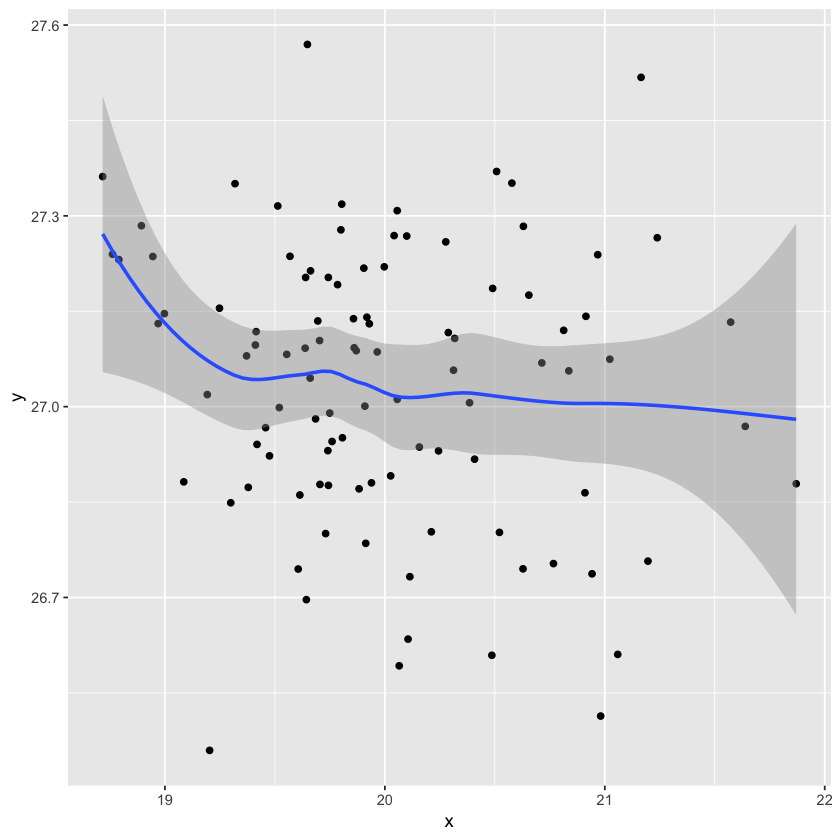

In [387]:
x = rnorm(100, 20, sqrt(.45))
y = rnorm(100, 27, sqrt(.05))
ols = lm(y~x)
ols

ggplot(data=data_frame(x,y), aes(x, y)) + geom_point() + stat_smooth()


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -1.87402      0.07563  


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


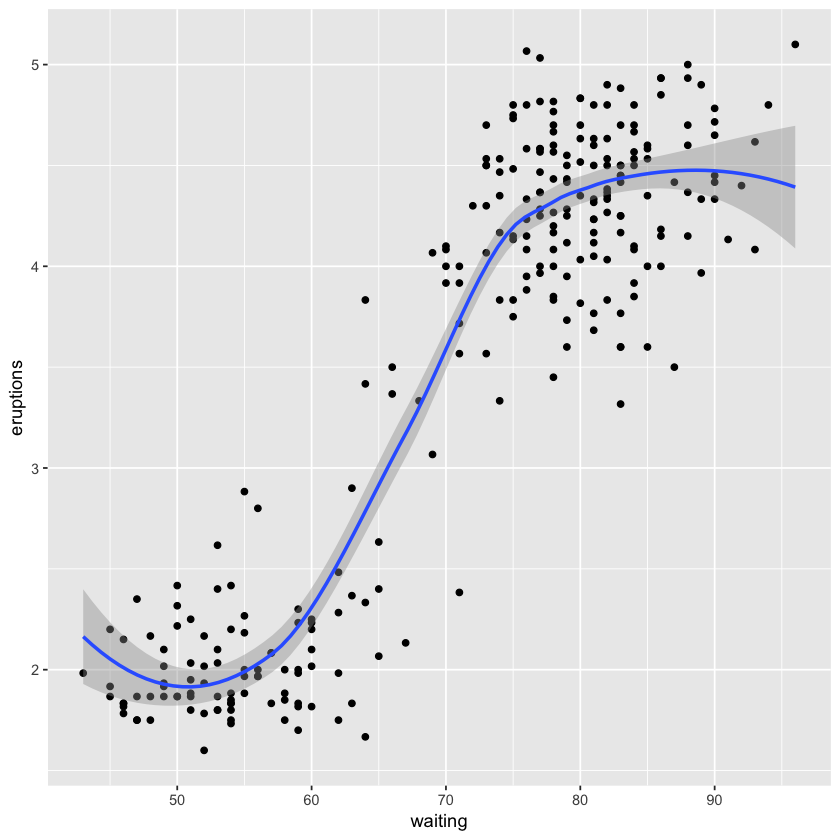

In [388]:
x = faithful$waiting
y = faithful$eruptions
ols = lm(y~x)
ols

ggplot(data=faithful, aes(waiting, eruptions)) + geom_point() + stat_smooth()